<a href="https://colab.research.google.com/github/Estebanc0/ADA-Informes/blob/main/Informe_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descripcion del problema

Entrada: 2 matrices de enteros que representan el valor y el peso de n objetos ademas de un entero que representa la capacidade de la mochila.

Salida: el valor total maximo de la mochila.

# Descripcion del algoritmo

En una tabla DP[][], consideremos todos los pesos posibles desde '1' hasta 'W' como columnas y pesos que se pueden mantener como filas. 
El estado DP[i][j] denotará el valor máximo de 'j-weight' considerando todos los valores de '1 a i-ésimo'. Entonces, si consideramos 'wi' (peso en la 'ésima' fila), podemos completarlo en todas las columnas que tienen 'valores de peso> wi'. Ahora pueden tener lugar dos posibilidades: 

Complete 'wi' en la columna dada.
No llene 'wi' en la columna dada.


In [3]:
def knapSack(W, wt, val, n):
    K = [[0 for x in range(W + 1)] for x in range(n + 1)]
    # Build table K[][] in bottom up manner
    aux=0
    for i in range(n + 1):
        for w in range(W + 1):
            aux+=1
            if i == 0 or w == 0:
                K[i][w] = 0
                
            elif wt[i-1] <= w:
                K[i][w] = max(val[i-1]
                          + K[i-1][w-wt[i-1]], 
                              K[i-1][w])
            else:
                K[i][w] = K[i-1][w]
               
    return K[n][W],aux 
 


In [4]:
# Driver code
val = [10, 15, 40] 
wt = [1, 2, 3] 
W = 6
n=len(val)
m,c=knapSack(W, wt, val,n)

print("valor final:",m,"\numero de subproblemas:",c)
 

valor final: 65 
umero de subproblemas: 28


In [5]:
def bubblesortByRatio(list1, list2):
  n = len(list1)
  order = list(range(n))
  for i in range(n - 1, 0, -1):     # i ranges from n-1 down to 1
    for j in range(0, i):           # j ranges from 0 up to i-1
      # if ratio of jth numbers > ratio of (j+1)st numbers then
      if ((1.0 * list1[order[j]]) / list2[order[j]]) < ((1.0 * list1[order[j+1]]) / list2[order[j+1]]):
        temp = order[j]              # exchange "pointers" to these items
        order[j] = order[j+1]
        order[j+1] = temp
  return order

In [6]:
def KnapsackFrac(v, w, W):
  order = bubblesortByRatio(v, w)            # sort by v/w (see bubblesort below)
  weight = 0.0                               # current weight of the solution
  value = 0.0                                # current value of the solution
  knapsack = []                              # items in the knapsack - a list of (item, faction) pairs
  n = len(v)
  index = 0                                  # order[index] is the index in v and w of the item we're considering
  while (weight < W) and (index < n):
    if weight + w[order[index]] <= W:        # if we can fit the entire order[index]-th item
      knapsack.append((order[index], 1.0))   # add it and update weight and value
      weight = weight + w[order[index]]
      value = value + v[order[index]]
    else:
      fraction = (W - weight) / w[order[index]]  # otherwise, calculate the fraction we can fit
      knapsack.append((order[index], fraction))  # and add this fraction
      weight = W
      value = value + v[order[index]] * fraction
    index = index + 1
  return (value)

In [7]:
v=[60, 100, 120]
w=[10,20,30]
W=50
KnapsackFrac(v, w, W)

240.0

# Complejidad temporal

Programacion dinamica:
Posee un tiempo de ejecucion de O(N*W) donde 'N' es el número de elementos de peso y 'W' es la capacidad.


Greedy:
si los elementos ya están dispuestos en el orden requerido, el ciclo while toma O (n) tiempo, si no estan ordenados el tiempo depende del algoritmo de ordenamiento a utilizar, por ejemplo si se implementa con quicksort pasaria a tener O(nlogn).

# CORRECTITUD
Vamos a hacer la prueba por inducción aquí:
Decimos par (i, j) < (i', j') si i < i' o (i = i' y j < j').
el algoritmo es correcto para todos los valores de a[i, j] donde (i, j) < (i', j').

Caso base: a[i, 0] = a[0, j] = 0 para todo i, j

Al calcular a[i'
, j'], por hipótesis de inducción, tenemos a[i' − 1, j'],
a[i' − 1, j' − wi'] ya están calculados correctamente. Entonces el algoritmo considera el valor óptimo para
el objeto i'
en la mochila como a[i' −1, j' −wi']+vi' y para el artículo i'no en la mochila como a[i' −1, j']. Por lo tanto, el valor para a[i',j'] es correcto.

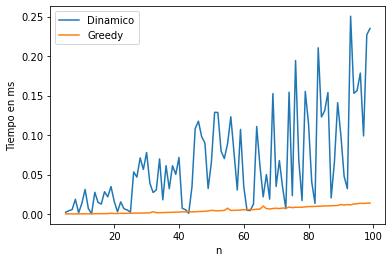

In [8]:
import matplotlib.pyplot as plt
import datetime
import random
from timeit import repeat

x=[]; x2=[]
y=[]; y2=[]

for n in range(5,100):

  v = random.sample(range(1, 200), n)
  wt= random.sample(range(1, 200), n)
  w = random.randint(1,600)
  t = repeat(setup="from __main__ import knapSack", stmt=f"knapSack({w},{wt},{v},{n})", repeat=1, number=10)

  x.append(n)
  y.append(t)
  t = repeat(setup="from __main__ import KnapsackFrac", stmt=f"KnapsackFrac({v},{wt},{w})", repeat=1, number=10)
  
  x2.append(n)
  y2.append(t)

plt.plot(x,y)
plt.plot(x2,y2)
plt.legend(["Dinamico","Greedy"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

# ANALISIS DE RESULTADOS

Segun los resultados del analisis experimental de tiempo la solucion con el metodo greedy posee un menor tiempo de ejecucion que la solucion dinamica la cual posee demasiados picos y desniveles a medida que aumenta el tamaño de los arreglos